- Trong bài tập này, ta sẽ làm quen với Regression (hồi quy): 
    - Chúng ta sử dụng nó để dự báo các bài toán như giá nhà phụ thuộc vào số phòng, diện tích,...   
    - Ta sẽ làm việc với dữ liệu 'gapminder.csv', để lấy ra 2 trường là tuổi thọ và tỷ lệ sinh.  
- Ta sẽ xem các cách regularization Lasso(l1), Rigde(l2)
- Ta cũng xem cách xác thực chéo để đảm bảo mô hình dự đoán có tính tổng thể

1. Regression 

<img src = 'https://i.imgur.com/qcoTF32.jpg'>

In [1]:
import numpy as np
import pandas as pd

Đọc file csv theo câu lệnh: pd_read.csv('...')

In [2]:
pf = pd.read_csv('gapminder.csv')

In [3]:
pf.head()

,population,fertility,HIV,CO2,BMI_male,GDP,BMI_female,life,child_mortality,Region
0,34811059.0,2.73,0.1,3.328945,24.59620,12314.0,129.9049,75.3,29.5,Middle East & North Africa
1,19842251.0,6.43,2.0,1.474353,22.25083,7103.0,130.1247,58.3,192.0,Sub-Saharan Africa
2,40381860.0,2.24,0.5,4.785170,27.50170,14646.0,118.8915,75.5,15.4,America
3,2975029.0,1.40,0.1,1.804106,25.35542,7383.0,132.8108,72.5,20.0,Europe & Central Asia
4,21370348.0,1.96,0.1,18.016313,27.56373,41312.0,117.3755,81.5,5.2,East Asia & Pacific


In [4]:
pf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 139 entries, 0 to 138
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   population       139 non-null    float64
 1   fertility        139 non-null    float64
 2   HIV              139 non-null    float64
 3   CO2              139 non-null    float64
 4   BMI_male         139 non-null    float64
 5   GDP              139 non-null    float64
 6   BMI_female       139 non-null    float64
 7   life             139 non-null    float64
 8   child_mortality  139 non-null    float64
 9   Region           139 non-null    object 
dtypes: float64(9), object(1)
memory usage: 11.0+ KB


In [5]:
pf.describe()

,population,fertility,HIV,CO2,BMI_male,GDP,BMI_female,life,child_mortality
count,1.390000e+02,139.000000,139.000000,139.000000,139.000000,139.000000,139.000000,139.000000,139.000000
mean,3.549977e+07,3.005108,1.915612,4.459874,24.623054,16638.784173,126.701914,69.602878,45.097122
std,1.095121e+08,1.615354,4.408974,6.268349,2.209368,19207.299083,4.471997,9.122189,45.724667
min,2.773150e+05,1.280000,0.060000,0.008618,20.397420,588.000000,117.375500,45.200000,2.700000
25%,3.752776e+06,1.810000,0.100000,0.496190,22.448135,2899.000000,123.232200,62.200000,8.100000
50%,9.705130e+06,2.410000,0.400000,2.223796,25.156990,9938.000000,126.519600,72.000000,24.000000
75%,2.791973e+07,4.095000,1.300000,6.589156,26.497575,23278.500000,130.275900,76.850000,74.200000
max,1.197070e+09,7.590000,25.900000,48.702062,28.456980,126076.000000,135.492000,82.600000,192.000000


Để xem tương quan giữa các cột trong dữ liệu, ta thực hiện như sau:

<AxesSubplot:>

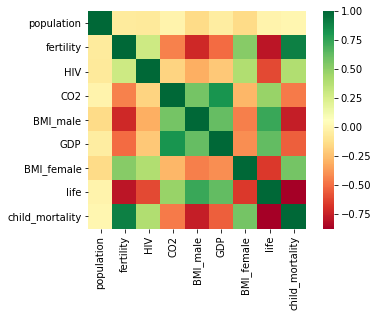

In [6]:
import seaborn as sns
sns.heatmap(pf.corr(), square=True, cmap='RdYlGn')

Ở trên ta thấy màu ở các ô thể hiện sự tương quan giữa các cột dữ liệu. Màu càng xanh, 2 cột dữ liệu có tính liên quan, và màu gần đỏ thì ngược lại. Ví dụ trên 'life' có tính liên quan với 'co2', 'bmi..', 'gdp'.

Ta lấy dữ liệu 'fertility' và 'life' để dự đoán tuổi thọ theo khả năng sinh sản (tỷ lệ sinh trung bình của 1 phụ nữ). Ta thêm .values để đảm bảo cho việc xử lý reshape về sau

In [7]:
X = pf['fertility'].values
y = pf['life'].values

Ta xem kích thước 2 tập dữ liệu

In [8]:
print(X.shape)
print(y.shape)

(139,)
(139,)


Ta reshape dữ liệu để sử dụng cho dự đoán

In [9]:
y = y.reshape(-1,1)
X = X.reshape(-1,1)
print(X.shape)
print(y.shape)

(139, 1)
(139, 1)


In [10]:
from sklearn.linear_model import LinearRegression

reg = LinearRegression()
reg.fit(X,y)
reg.score(X, y) #R2 score

0.6192442167740035

Lấy các mẫu để vẽ biểu đồ, lấy 50 giá trị cách đều nhau từ min X đến max X

In [11]:
prediction_space = np.linspace(min(X), max(X)).reshape(-1,1)

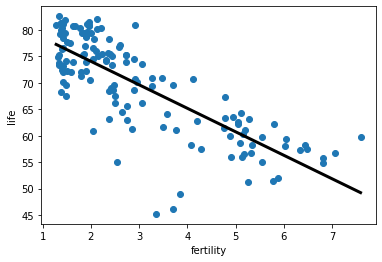

In [12]:
import matplotlib.pyplot as plt

plt.scatter(X, y) # thể hiện X,y trên biểu đồ
plt.plot(prediction_space, reg.predict(prediction_space), color='black', linewidth=3) # dự đoán X,y theo hồi quy tuyến tính
plt.ylabel('life')
plt.xlabel('fertility')
plt.show()

Ta thấy tỷ lệ sinh càng ít tuổi thọ càng cao, và ngược lại!

2. Chia dữ liệu, MSE, RMSE
- Bây giờ ta thực hiện regression với việc chia tập dữ liệu thành train và test. Sau đó tính RMSE của y_test dụ đoán và y_test.
- Tham khảo MSE, RMSE: [wikimedia](https://vi.wikipedia.org/wiki/Sai_s%E1%BB%91_to%C3%A0n_ph%C6%B0%C6%A1ng_trung_b%C3%ACnh)

In [13]:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split( X,y, test_size = 0.3, random_state= 42)
reg_all = LinearRegression()
reg_all.fit(X_train, y_train)
ytest_pred = reg_all.predict(X_test)
print('Score R2 test: ', reg_all.score(X_test, y_test))
print('RMSE: ', np.sqrt(mean_squared_error(ytest_pred, y_test)))

Score R2 test:  0.7298987360907494
RMSE:  4.194027914110243


3. Xác thực chéo:
Tham khảo [xác thực chéo](https://ichi.pro/vi/xac-thuc-cheo-la-gi-106378280410741)

In [14]:
from sklearn.model_selection import cross_val_score

reg = LinearRegression()
cv_scores = cross_val_score(reg, X,y, cv= 5) #function uses  as the metric of choice for regression
print(cv_scores)
print("Average 5-Fold CV Score: {}".format(np.mean(cv_scores)))

[0.71001079 0.75007717 0.55271526 0.547501   0.52410561]
Average 5-Fold CV Score: 0.6168819644425119


In [15]:
cvscores_3 = cross_val_score(reg,X,y,cv=3)
print(np.mean(cvscores_3))

cvscores_10 = cross_val_score(reg,X,y,cv=10)
print(np.mean(cvscores_10))

0.6294715754653507
0.5883937741571185


4. Lasco (L1 regularization): Chúng ta xem tính năng (feature) nào của X là quan trong nhất trong dự đoán y. Giảm trọng số của những tính năng không quan trọng về 0. 

<img src = 'https://i.imgur.com/StP9iDs.jpg'>

In [16]:
features = ['population', 'fertility', 'HIV', 'CO2', 'BMI_male', 'GDP',
       'BMI_female', 'child_mortality']
X = pf[features]
print(X.shape)
X.head()

(139, 8)


,population,fertility,HIV,CO2,BMI_male,GDP,BMI_female,child_mortality
0,34811059.0,2.73,0.1,3.328945,24.59620,12314.0,129.9049,29.5
1,19842251.0,6.43,2.0,1.474353,22.25083,7103.0,130.1247,192.0
2,40381860.0,2.24,0.5,4.785170,27.50170,14646.0,118.8915,15.4
3,2975029.0,1.40,0.1,1.804106,25.35542,7383.0,132.8108,20.0
4,21370348.0,1.96,0.1,18.016313,27.56373,41312.0,117.3755,5.2


[-0.         -0.         -0.          0.          0.          0.
 -0.         -0.07087587]


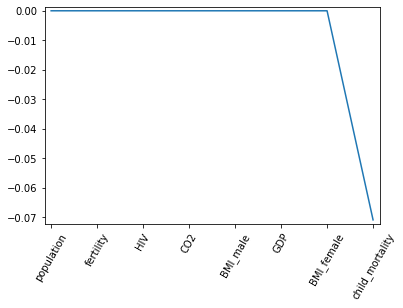

In [17]:
from sklearn.linear_model import Lasso

lasso = Lasso(alpha = 0.4, normalize = True)
lasso.fit(X,y)
lasso_coef = lasso.coef_
print(lasso_coef)

plt.plot(range(len(features)), lasso_coef)
plt.xticks(range(len(features)), features, rotation=60)
plt.margins(0.02)
plt.show()

Ta thấy với lasso, trọng số quan trọng nhất với life là child_mortality

5. Rigde(L2 regularization)

<img src = 'https://i.imgur.com/4G2aNBj.jpg'>

In [18]:
def display_plot(cv_scores, cv_scores_std):
    fig = plt.figure()
    ax = fig.add_subplot(1,1,1)
    ax.plot(alpha_space, cv_scores)

    std_error = cv_scores_std / np.sqrt(10)

    ax.fill_between(alpha_space, cv_scores + std_error, cv_scores - std_error, alpha=0.2)
    ax.set_ylabel('CV Score +/- Std Error')
    ax.set_xlabel('Alpha')
    ax.axhline(np.max(cv_scores), linestyle='--', color='.5')
    ax.set_xlim([alpha_space[0], alpha_space[-1]])
    ax.set_xscale('log')
    plt.show()

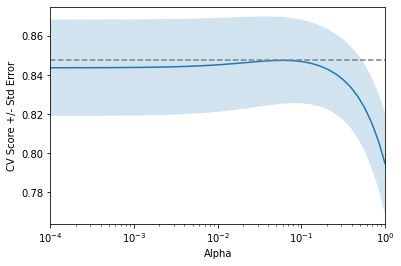

In [19]:
from sklearn.linear_model import Ridge

alpha_space = np.logspace(-4, 0, 50)
ridge_scores = []
ridge_scores_std = []

ridge = Ridge(alpha = True, normalize=True)

for alpha in alpha_space:
    ridge.alpha = alpha
    ridge_cv_scores = cross_val_score(ridge, X,y, cv= 10) #10-fold CV
    ridge_scores.append(np.mean(ridge_cv_scores))
    ridge_scores_std.append(np.std(ridge_cv_scores))

display_plot(ridge_scores, ridge_scores_std)